# Task 1

The Swap test is a simple quantum circuit which, given two states, allows to compute how muchdo they differ from each other.

1)	Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state.

In [26]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
import numpy as np

def varcct(theta,phi):
    qc=QuantumCircuit(1)
    qc.ry(np.pi*theta, 0)
    qc.rz(2*np.pi*phi, 0)
    return qc

Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

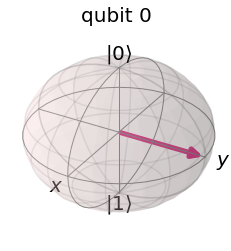

In [20]:
from qiskit.visualization import plot_bloch_multivector

qc=varcct(0.5,0.25)
backend = Aer.get_backend('statevector_simulator')
outstate = execute(qc,backend).result().get_statevector()

plot_bloch_multivector(outstate)

2)	Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

In [138]:
import random
random_theta=random.random()
random_phi=random.random()

def varSWAP(theta,phi):
    qr = QuantumRegister(3)
    cr = ClassicalRegister(1)
    qc=QuantumCircuit(qr,cr)
    
    qc.h(0)
    qc.ry(np.pi*theta, 1)
    qc.rz(2*np.pi*phi, 1)
    qc.ry(np.pi*random_theta, 2)
    qc.rz(2*np.pi*random_phi, 2)
    
    qc.ccx(0,1,2)
    qc.ccx(0,2,1)
    qc.ccx(0,1,2)
    qc.h(0)
    
    qc.measure(0,cr)
    return qc

In [145]:
step=0.1
shots=1024
para0=0
para1=0
fidelity=0

for i in np.arange(0,1,step):
    for j in np.arange(0,1,step):
        qc=varSWAP(i,j)
        backend = Aer.get_backend('qasm_simulator')
        counts = execute(qc,backend=backend, shots=shots).result().get_counts()
        if counts['0']/shots > fidelity:
            fidelity=counts['0']/shots
            para0=i
            para1=j

In [146]:
print('exact parameters:',random_theta,random_phi)
print('estimated parameters:',para0,para1)

exact parameters: 0.13066852876576096 0.831205570021623
estimated parameters: 0.1 0.8


3)	Suppose you are given with a random state, made by N qubits, for which you only know that it is a product state and each of the qubits are in the state | 0 > or | 1>. By product state we mean that it can be written as the product of single qubit states, without the need to do any summation. For example, the state
|a> = |01>
Is a product state, while the state
|b> = |00> + |11>
Is not.

Perform a qubit by qubit SWAP test to reconstruct the state. This part of the problem can be solved via a simple grid search.

In [143]:
N=5
state=np.round(np.random.random(N))
print('initial randomstate:', state)

def vargrd(grid):
    qr0 = QuantumRegister(1)
    qr1 = QuantumRegister(N)
    qr2 = QuantumRegister(N)
    cr = ClassicalRegister(1)
    qc=QuantumCircuit(qr0,qr1,qr2,cr)

    qc.h(0)
    for i in range(N):
        if state[i]: qc.x(qr2[i])
        if grid[i]: qc.x(qr1[i])

    for i in range(N):
        qc.ccx(qr0,qr1[i],qr2[i])
        qc.ccx(qr0,qr2[i],qr1[i])
        qc.ccx(qr0,qr1[i],qr2[i])

    qc.h(0)
    qc.measure(qr0,cr)
    return qc

initial randomstate: [0. 0. 1. 0. 1.]


In [144]:
fidelity=0
params=[]
for M in range(2**N):
    grid=[]
    for i in range(N):
        grid.append(M%2)
        M//=2
        
    qc=vargrd(grid)
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc,backend=backend, shots=1024).result().get_counts()
    if counts['0']/1024>fidelity:
        fidelity=counts['0']/1024
        params=grid
print('reconstructed state:',params)

reconstructed state: [0, 0, 1, 0, 1]
